- ## Escolha do modelo
- ## Treinamento do modelo
- ## Teste do modelo
- ## Armazenamento do modelo

In [1]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning
warnings.filterwarnings('ignore') # inibe a exibição de avisos de warning

In [2]:
# modelos de regressão
from sklearn.linear_model import LinearRegression # se ajusta a um modelo linear minimizando a soma dos quadrados residuais entre as previsões e os valores observados
from sklearn.linear_model import Lasso # modelo de regressão linear que utiliza a regularização L1 para estimar coeficientes esparsos, ajudando a evitar o overfitting
from sklearn.linear_model import ElasticNet # método de regressão regularizada que combina penalidades de Lasso (L1) e Ridge (L2) para melhorar a previsibilidade do modelo

from sklearn.tree import DecisionTreeRegressor # utilizam uma estrutura semelhante a uma árvore para classificar dados em categorias diferentes, permitindo decisões baseadas em características das entradas
from sklearn.neighbors import KNeighborsRegressor # modelo de regressão que utiliza os k-vizinhos mais próximos para prever o alvo
from sklearn.svm import SVR # (Suporte à Regressão Vetorial) é uma técnica de aprendizado de máquina utilizada para realizar regressões e pode lidar com kernels lineares e não-lineares

from sklearn.ensemble import RandomForestRegressor # estimador meta que ajusta uma série de regressões de árvores de decisão em subamostras do conjunto de dados e usa a média para melhorar a precisão das previsões
from sklearn.ensemble import GradientBoostingRegressor # estimador que constrói um modelo aditivo de forma progressiva e permite a otimização de funções de perda diferenciáveis
from sklearn.ensemble import ExtraTreesRegressor # método de aprendizado de conjunto para tarefas de regressão que constrói múltiplas árvores de decisão e média suas previsões para melhor desempenho
from sklearn.ensemble import AdaBoostRegressor # metamodelo que começa ajustando um regressor no conjunto de dados original e, em seguida, ajusta cópias adicionais do regressor em cópias ponderadas do conjunto de dados

In [3]:
# análise de dados e avaliação dos modelos
from sklearn.model_selection import train_test_split # utilizada para dividir conjuntos de dados em subconjuntos de treino e teste, ajudando na validação de modelos
from sklearn.model_selection import KFold # técnica de validação cruzada que divide um conjunto de dados em 'k' subconjuntos (folds) para treinar e testar modelos, garantindo que cada exemplo seja usado para treinamento e teste
from sklearn.model_selection import cross_val_score # avalia o desempenho de um estimador usando validação cruzada. Ela divide os dados em k partes e treina o modelo k vezes

from sklearn.metrics import mean_squared_error # métrica de avaliação que mede a média dos erros quadráticos entre os valores previstos e os valores reais

In [4]:
# análise de dados e avaliação dos modelos
from sklearn.model_selection import GridSearchCV # realizar uma busca exaustiva sobre combinações de parâmetros especificados para um estimador. Ele ajuda a otimizar o desempenho do modelo
from sklearn.metrics import r2_score 

In [5]:
# preparação e visualização de dados
import numpy as np # computação de matrizes
from matplotlib import pyplot # plotagem gráfica

In [6]:
# carregando arquivo tratado em dataframe
df_risk = pd.read_csv('df_treated/df_risk_tolerance.csv')

In [7]:
# conferindo a dimensão do dataframe, linhas e colunas
df_risk.shape

(3930, 12)

In [8]:
# ordenando pelo index o dataframe carregado
df_risk = df_risk.sort_index()

In [9]:
# reconhecendo as primeiras linhas do df
df_risk.head(5)

,AGE,EDCL,MARRIED,KIDS,OCCAT1,INCOME,NETWORTH,tolerancia_risco,RISK,standard__AGE,standard__INCOME,standard__NETWORTH
0,63.0,4,1,0,1,324273.547090,2391000.0,0.791073,1,0.673961,2.217976,1.887917
1,63.0,4,1,0,1,324273.547090,2421310.0,0.791271,1,0.673961,2.217976,1.925633
2,63.0,4,1,0,1,324273.547090,1957700.0,0.753915,1,0.673961,2.217976,1.348739
3,68.0,4,1,0,3,95120.240481,2720900.0,0.464435,3,0.975590,-0.486886,2.298428
4,68.0,4,1,0,3,95120.240481,2626900.0,0.463466,3,0.975590,-0.486886,2.181459


In [10]:
# eliminando as colunas originais que foram transformadas e não serão usadas no treino
df_risk = df_risk.drop(columns=['AGE','INCOME','NETWORTH'], axis=1)

In [11]:
# obtendo a lista de features do dataframe
list(df_risk.columns)

['EDCL',
 'MARRIED',
 'KIDS',
 'OCCAT1',
 'tolerancia_risco',
 'RISK',
 'standard__AGE',
 'standard__INCOME',
 'standard__NETWORTH']

In [12]:
# renomeando as colunas para facilitar o trabalho
df_risk.columns = ['EDCL',\
                    'MARRIED',\
                    'KIDS',\
                    'OCCAT1',\
                    'tolerancia_risco',\
                    'RISK',\
                    'AGE',\
                    'INCOME',\
                    'NETWORTH']

In [13]:
# verificando a posição de cada variável
df_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDCL              3930 non-null   int64  
 1   MARRIED           3930 non-null   int64  
 2   KIDS              3930 non-null   int64  
 3   OCCAT1            3930 non-null   int64  
 4   tolerancia_risco  3930 non-null   float64
 5   RISK              3930 non-null   int64  
 6   AGE               3930 non-null   float64
 7   INCOME            3930 non-null   float64
 8   NETWORTH          3930 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 276.5 KB


In [14]:
# separando variáveis independentes(x) e dependente(y)
X = df_risk.drop(columns='tolerancia_risco', axis=1)
y = df_risk[['tolerancia_risco']]

In [15]:
print('X=', X.info())
print('y=', y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EDCL      3930 non-null   int64  
 1   MARRIED   3930 non-null   int64  
 2   KIDS      3930 non-null   int64  
 3   OCCAT1    3930 non-null   int64  
 4   RISK      3930 non-null   int64  
 5   AGE       3930 non-null   float64
 6   INCOME    3930 non-null   float64
 7   NETWORTH  3930 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 245.8 KB
X= None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3930 entries, 0 to 3929
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tolerancia_risco  3930 non-null   float64
dtypes: float64(1)
memory usage: 30.8 KB
y= None


In [16]:
# separando os sets de treino e teste em 15% para teste, 15% para validação e 70% para treino
test_size = 0.30
validation_size = 0.50
seed = 42
seed2 = 40
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_test, Y_test, test_size=validation_size, random_state=seed2)

In [17]:
# hiperparâmetros da CV (cross validation)
num_folds = 10
scoring = 'r2'

In [18]:
# implementando os modelos de ML
models = []

# regressão e árvore de regressão
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# ensemble - boosting
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))

# ensemble - bagging
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

- Foi criado uma lista de modelos para automatizar o treinamento e a avaliação de todos eles, evitando que o trabalho fosse feito repetidamente de forma manual, tornando o trabalho mais rápido e preciso.

### Treinando os Modelos: 'EN', 'LASSO', 'LR', 'KNN', 'SVR', 'GBR', 'RFR', 'ETR', 'CART', 'ABR'

In [19]:
# obtendo os scores do k-fold e o erro quadrático médio entre o resultado conhecido e o resultado previsto
names = []
kfold_results = []
test_results = []
train_results = []

for name, model in models:
    names.append(name)

    if name in ('EN', 'LASSO'): #'EN', 'LASSO'): 
        divisorC, divisorK=1, 1
        #divisorC=100 # modificando a escala para visualizar no gráfico   
        #divisorK=10  
    else:
        if name in ('LR', 'KNN', 'SVR', 'GBR', 'RFR', 'ETR', 'CART', 'ABR'): 
            divisorC, divisorK= 1, 1
            #divisorK=0.1 # modificando a escala para visualizar no gráfico  
            #divisorC=0.1          

    # análise k-fold
    kfold = KFold(n_splits=num_folds, random_state=None)

    # erro quadrático médio convertido para positivo. Quanto menor melhor.
    cv_results = cross_val_score(model, X_train, Y_train, cv= kfold, scoring=scoring)
    kfold_results.append(cv_results/divisorK)

    # período completo de treinamento
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result/divisorC)

    if name in ('LR'):
        LR_model = res       

    if name in ('SVR'):
        SVR_model = res 

    # resultado dos testes
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result/divisorC)

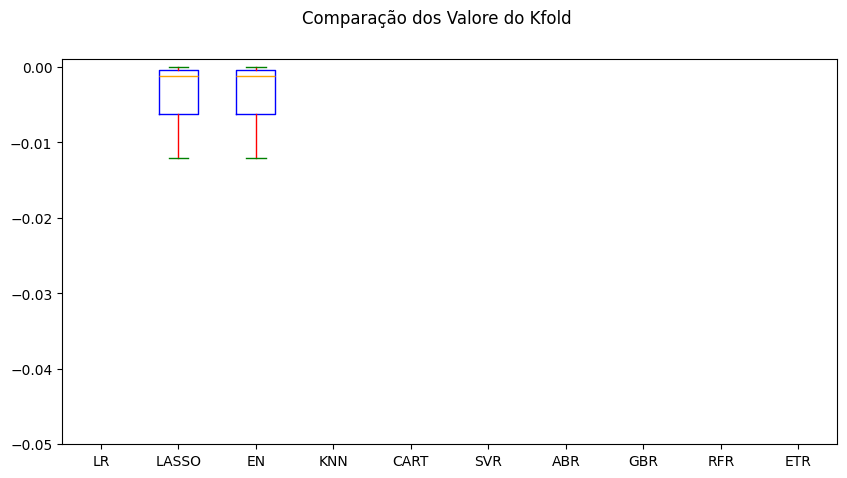

In [20]:
# comparando resultados da validação cruzada
# quanto maior o cross_val_score o modelo é mais consistente e generalizável
fig = pyplot.figure()
fig.suptitle('Comparação dos Valore do Kfold')
ax = fig.add_subplot(111)
ymin= -0.05
ymax= 0.001
pyplot.ylim(ymin, ymax)
pyplot.boxplot(kfold_results, boxprops=dict(color='blue'), whiskerprops=dict(color='red'), \
               capprops=dict(color='green'), medianprops=dict(color='orange'), \
               flierprops=dict(markerfacecolor='red', marker='o'))
ax.set_xticklabels(names)
fig.set_size_inches(10,5)
pyplot.show()

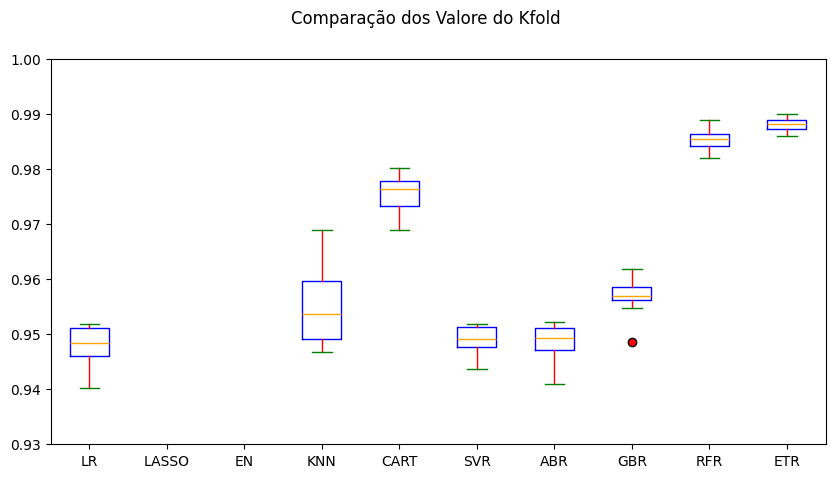

In [21]:
# comparando resultados da validação cruzada
# quanto maior o cross_val_score o modelo é mais consistente e generalizável
fig = pyplot.figure()
fig.suptitle('Comparação dos Valore do Kfold')
ax = fig.add_subplot(111)
ymin= 0.93
ymax= 1.0
pyplot.ylim(ymin, ymax)
pyplot.boxplot(kfold_results, boxprops=dict(color='blue'), whiskerprops=dict(color='red'), \
               capprops=dict(color='green'), medianprops=dict(color='orange'), \
               flierprops=dict(markerfacecolor='red', marker='o'))
ax.set_xticklabels(names)
fig.set_size_inches(10,5)
pyplot.show()

- Um valor maior de cross_val_score geralmente sugere que o modelo se adapta melhor aos dados e apresenta um desempenho superior na validação cruzada. 
- LASSO E ElasticNet (EN) apresentaram o melhor resultado do kfold, então seriam até agora os escolhidos baseados nessa avaliação.

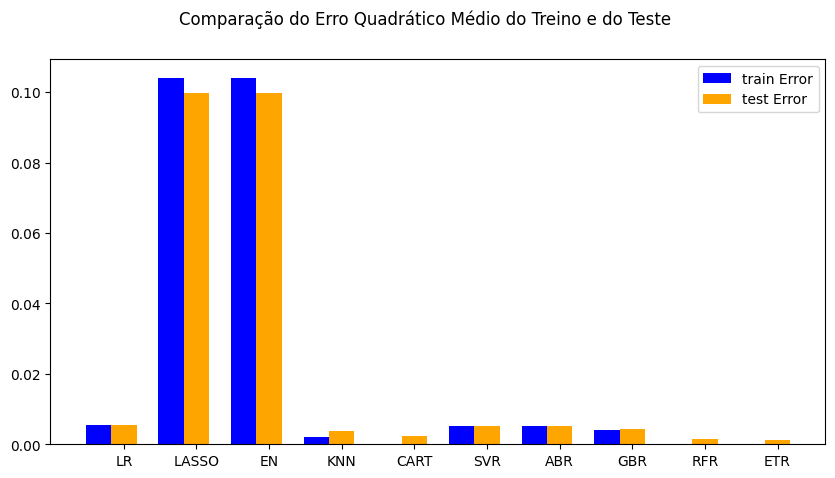

In [22]:
# analisando o erro de treinamento e de teste
# comparando algoritmos
fig = pyplot.figure()

ind = np.arange(len(names)) # as localidades x para os grupos
width = 0.35 # largura das barras

fig.suptitle('Comparação do Erro Quadrático Médio do Treino e do Teste')
ax = fig.add_subplot(111)
pyplot.bar(ind - width, train_results, width=width, label='train Error', color='blue')
pyplot.bar(ind, test_results, width=width, label='test Error', color='orange')
fig.set_size_inches(10,5)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.savefig('grafic_image/compara_erro.png', format='png')
pyplot.show()


- Verificamos que o modelo LR - Linear Regression juntamente com o SVR teve um melhor resultado quando analisamos o valor do kfold (gráfico kfold) em conjunto com o erro de treino e teste, que apresenta um valor baixo e equiparados.

- Quando o erro quadrático médio (MSE) do conjunto de teste é maior que o do conjunto de treinamento, isso pode indicar um problema de overfitting, onde o modelo se ajustou muito bem aos dados de treinamento, mas não generaliza bem para os dados novos.

In [23]:
# Grid search para RandomForestRegressor: 
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]} 
model = RandomForestRegressor() 
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(X_train, Y_train) 
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params']

Best: 0.985374 using {'n_estimators': 350}


In [24]:
# fazendo o treinamento do modelo de RandomForestRegressor
model = RandomForestRegressor(n_estimators = 350) 
model.fit(X_train, Y_train)
RFR_model = model

In [25]:
# fazendo a predição com os dados de treino
predictions_train = model.predict(X_train) 
print('r2_score =', r2_score(Y_train, predictions_train))

r2_score = 0.9982240145442267


In [26]:
# fazendo a predição com os dados de validação
predictions = model.predict(X_validation) 
print('erro quadrático médio =', mean_squared_error(Y_validation, predictions)) 
print('r2_score =', r2_score(Y_validation, predictions))

erro quadrático médio = 0.0015303880366248552
r2_score = 0.9856802139423754


- O r2_score da predição dos dados mostra um valor bastante significativo para os dados de treino como também para os dados de validação ficando ambos muito próximos, o que valida o modelo já que se comporta bem com dados de treino e com dados de validação, ficando praticamente equiparados, afastando totalmente alguma suspeita de overfitting.

- O erro quadrático médio da validação também ficou muito baixo o que viabiliza o modelo.

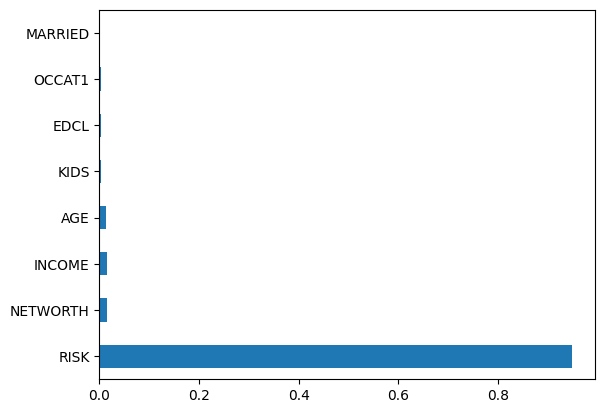

In [27]:
# plotando as importâncias de cada feature para comparação

#model = RandomForestRegressor(n_estimators= 200,n_jobs=-1) 
#model.fit(X_train,Y_train) 

#usar a classe nativa feature_importances dos classificadores baseados em árvores 
#plotar um gráfico das importâncias dos features para melhor visualização 
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(10).plot(kind='barh') 
pyplot.show()

## Faz o Deploy do Modelo

In [28]:
# faz o deploy do modelo para ser utilizado posteriormente
from joblib import dump

dump(LR_model, 'model/LR_risk_tolerance.pkl')
dump(RFR_model, 'model/RFR_risk_tolerance.pkl')
dump(SVR_model, 'model/SVR_risk_tolerance.pkl')

['model/SVR_risk_tolerance.pkl']

- Houve três modelos treinados que podem ser usados para que seja apurado a tolerância a risco de uma pessoa, os três apresentaram um resultado satisfatório quanto ao erro de teste e treino como também o r2_score e erro médio quadrático.